In [26]:
# libraries to display dataframe and images
from IPython.display import display
from PIL import Image
# matplotlib for vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gdown
# inbuild library to work with textual data
import string
# Setting up the NLTK to pre-processing textual data
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('treebank')
plt.style.use('fivethirtyeight')
sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", 100)
%matplotlib inline

[nltk_data] Downloading package punkt to /Users/akshays/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshays/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/akshays/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/akshays/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /Users/akshays/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/akshays/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/akshays/nltk_data...
[nltk_data]   Package treebank is already up-

In [5]:
!pip install gdown

  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)


In [6]:
!gdown 1MyOEKk_z78P8JL0mTYSerRiPLVflkVK6

Downloading...
From: https://drive.google.com/uc?id=1MyOEKk_z78P8JL0mTYSerRiPLVflkVK6
To: /Users/akshays/Documents/Personal Projects/NLP practivce/NLP_practice/medium_articles_v3.csv
100%|██████████████████████████████████████| 3.13M/3.13M [00:02<00:00, 1.34MB/s]


In [8]:
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 668.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 3.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.7/490.7 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.5 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.7 MB/s eta 0:00:0000:0100:01


In [9]:
import spacy
from spacy import displacy

In [12]:
articles = pd.read_csv('medium_articles_v3.csv')
display(articles.head(10))
print("Shape of dataframe : {}".format(articles.shape))

,link,title,sub_title,author,reading_time,text,id
0,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Understanding the key concepts of ensemble lea...,Joseph Rocca,20,This post was co-written with Baptiste Rocca.\...,1
1,https://towardsdatascience.com/understanding-a...,Understanding AUC - ROC Curve,"In Machine Learning, performance measurement i...",Sarang Narkhede,5,"In Machine Learning, performance measurement i...",2
2,https://towardsdatascience.com/how-to-work-wit...,How to work with object detection datasets in ...,"A comprehensive guide to defining, loading, ex...",Eric Hofesmann,10,Microsoft's Common Objects in Context dataset ...,3
3,https://towardsdatascience.com/11-dimensionali...,11 Dimensionality reduction techniques you sho...,Reduce the size of your dataset while keeping ...,Rukshan Pramoditha,16,"In both Statistics and Machine Learning, the n...",4
4,https://towardsdatascience.com/the-time-series...,The Time Series Transformer,Attention Is All You Need they said. Is it a m...,Theodoros Ntakouris,6,Attention Is All You Need they said. Is it a m...,5
5,https://netflixtechblog.com/learning-a-persona...,Learning a Personalized Homepage,how to best tailor each member's homepage to m...,Netflix Technology Blog,15,by Chris Alvino and Justin Basilico\nAs we've ...,6
6,https://towardsdatascience.com/6-data-science-...,6 Data Science Certificates To Level Up Your C...,Pump up your portfolio and get closer to your ...,Sara A. Metwalli,6,Because of the appeal of the field of data sci...,7
7,https://towardsdatascience.com/transformers-ex...,Transformers Explained Visually (Part 2): How ...,A Gentle Guide to the Transformer under the ho...,Ketan Doshi,11,This is the second article in my series on Tra...,8
8,https://medium.com/coders-camp/60-python-proje...,60 Python Projects with Source Code,60 Python Projects with Source code solved and...,Aman Kharwal,2,Python has been in the top 10 popular programm...,9
9,https://towardsdatascience.com/geometric-found...,Geometric foundations of Deep Learning,Geometric Deep Learning is an attempt to unify...,Michael Bronstein,13,This blog post was co-authored with Joan Bruna...,10


Shape of dataframe : (208, 7)


In [13]:
!pip install pprint

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint


In [16]:
from pprint import pprint
pprint(articles.iloc[1].to_dict(), compact=True)

{'author': 'Sarang Narkhede',
 'id': 2,
 'link': 'https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5?source=tag_archive---------1-----------------------',
 'reading_time': 5,
 'sub_title': 'In Machine Learning, performance measurement is an essential '
              'task. So when it comes to a classification problem, we can '
              'count on an AUC - ROC Curve. When we need to check or visualize '
              'the performance...',
 'text': 'In Machine Learning, performance measurement is an essential task. '
         'So when it comes to a classification problem, we can count on an AUC '
         '- ROC Curve. When we need to check or visualize the performance of '
         'the multi-class classification problem, we use the AUC (Area Under '
         'The Curve) ROC (Receiver Operating Characteristics) curve. It is one '
         'of the most important evaluation metrics for checking any '
         "classification model's performance. It is also written

In [18]:
articles.describe(include='all')

,link,title,sub_title,author,reading_time,text,id
count,208,208,208,208,208.000000,208,208.000000
unique,208,208,204,179,NaN,208,NaN
top,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Update: This article is part of a series. Chec...,Adam Geitgey,NaN,This post was co-written with Baptiste Rocca.\...,NaN
freq,1,1,4,5,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,12.375000,NaN,107.091346
std,NaN,NaN,NaN,NaN,13.880224,NaN,62.575453
min,NaN,NaN,NaN,NaN,2.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,52.750000
50%,NaN,NaN,NaN,NaN,9.000000,NaN,107.500000
75%,NaN,NaN,NaN,NaN,13.000000,NaN,162.250000


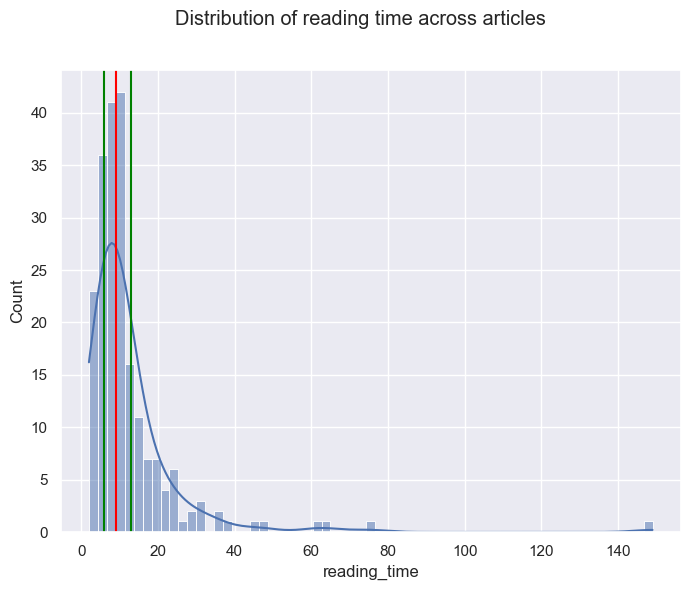

In [21]:
# ditsribution of reading times in our corpus
fig, axes = plt.subplots(figsize = (8, 6))
# creating histograms
sns.histplot(articles["reading_time"], kde=True, ax = axes)
# Computing percentile of the reading_time data.
first_q = np.percentile(articles["reading_time"], 25)
# Computing median (50th percentile) of the reading_time data.
second_q = np.percentile(articles["reading_time"], 50)
third_q = np.percentile(articles["reading_time"], 75)
# green lines for 25th and 75th percentile
plt.axvline(first_q, color = "green")
# red line for median reading_time
plt.axvline(second_q, color = "red")
plt.axvline(third_q, color = "green")
# plot title
plt.suptitle("Distribution of reading time across articles")
plt.show()

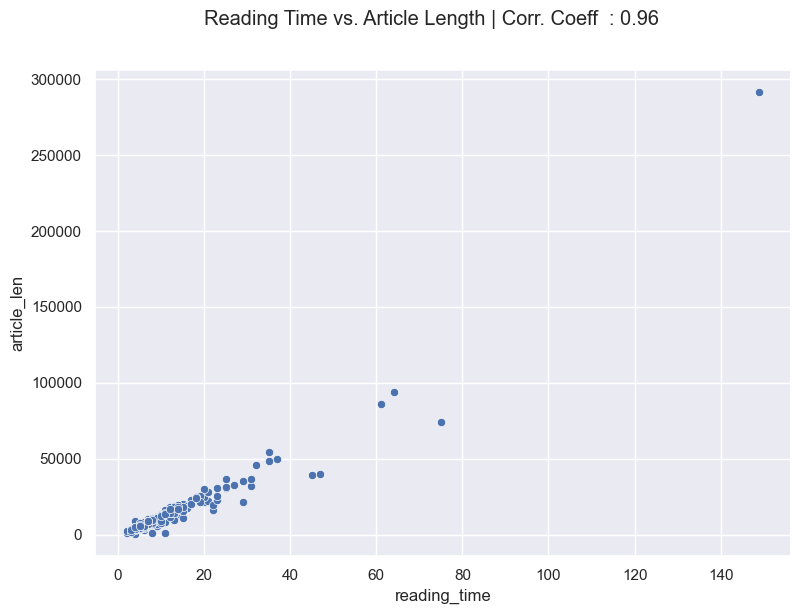

In [27]:
from scipy.stats import pearsonr

articles['article_len'] = articles['text'].apply(lambda x: len(x))

fig, axes = plt.subplots(figsize = (8,6))

sns.scatterplot(x = articles["reading_time"], y = articles["article_len"])
# Pearson correlation coefficient measures the linear relationship between two set of values.
corr_coeff, _ = pearsonr(articles["reading_time"], articles["article_len"])
# plot title
plt.suptitle("Reading Time vs. Article Length | Corr. Coeff  : {}".format(round(corr_coeff, 2)))
plt.show()

In [28]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 4.1 MB/s eta 0:00:00


In [41]:
from sklearn.preprocessing import OneHotEncoder
import itertools

docs = ["cat", "dog", "bat", "ate", "lion"]

tokens_docs = [doc.split(" ") for doc in docs]
all_tokens = itertools.chain.from_iterable(tokens_docs)
word_to_id = {token: idx for idx, token in enumerate(set(all_tokens))}

token_ids = [[word_to_id[token] for token in tokens_doc] for tokens_doc in tokens_docs]

vec = OneHotEncoder(categories='auto')
X = vec.fit_transform(token_ids)

print(X.toarray())

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [43]:
# Custom implementation of BOW

corpus = [
    "it was the best of times",
    "it was the worst of times",
    "it was the age of wisdom and the age of foolishness"
]

# possible optimization: Use Sparse vectors to store the CountBoW

def get_bow_representation(corpus, frequency = True):
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])
    
    bow_rep = []
    
    for sentence in corpus:
        sentence_rep = dict([(v,0) for v in vocabulary])
        for word in word_tokenize(sentence):
            if frequency:
                sentence_rep[word] +=1
            else:
                sentence_rep[word] = 1
        bow_rep.append(sentence_rep)
    return bow_rep

bow_representation = get_bow_representation(corpus, True)
df = pd.DataFrame(bow_representation)
df.index = corpus
display(df)

,worst,age,foolishness,of,it,was,the,wisdom,best,times,and
it was the best of times,0,0,0,1,1,1,1,0,1,1,0
it was the worst of times,1,0,0,1,1,1,1,0,0,1,0
it was the age of wisdom and the age of foolishness,0,2,1,2,1,1,2,1,0,0,1


# Using Sklearn CountVectorizer


Usage:   
  /Users/akshays/opt/anaconda3/bin/python -m pip <command> [options]

no such option: -u
Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

bow_rep = cv.fit_transform(corpus).todense() # returns amatrix

df = pd.DataFrame(bow_rep)
df.columns = cv.get_feature_names_out()
df.index = corpus
display(df)

,age,and,best,foolishness,it,of,the,times,was,wisdom,worst
it was the best of times,0,0,1,0,1,1,1,1,1,0,0
it was the worst of times,0,0,0,0,1,1,1,1,1,0,1
it was the age of wisdom and the age of foolishness,2,1,0,1,1,2,2,0,1,1,0


In [50]:
# using CountVectorizer for removing stop-words directly from the corpus.
cv = CountVectorizer(stop_words="english")
bow_rep = cv.fit_transform(corpus).todense()
df = pd.DataFrame(bow_rep)
df.columns = cv.get_feature_names_out()
df.index = corpus
display(df)

,age,best,foolishness,times,wisdom,worst
it was the best of times,0,1,0,1,0,0
it was the worst of times,0,0,0,1,0,1
it was the age of wisdom and the age of foolishness,2,0,1,0,1,0
